In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cassie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("All_Comments_Final.csv")
df.head(10)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816
5,Hey Ken! I am almost finishing my university d...,UgwimG8chbbq3OQuR1Z4AaABAg,0,0,2022-01-21T14:32:13Z,YR9Faf1uZDg,user_2217
6,So basically is it modest to say that the silv...,UgxdvNxfl4oh9zqJPFh4AaABAg,0,0,2022-01-21T13:40:39Z,Q9FjwzKFPuM,user_2816
7,"Hi Ken, as always, your videos are insightful ...",UgyZtSFQWOCOKWVzHLt4AaABAg,0,0,2022-01-21T05:36:38Z,rEWPqw6rMGI,user_2174
8,Watching this for a second time while working ...,Ugx3k4xS-oQi434WINV4AaABAg,0,1,2022-01-21T02:30:26Z,xpIFS6jZbe8,user_287
9,Any good resume templates I can use?,UgxWkiyn3UVPWws5JwR4AaABAg,0,0,2022-01-21T00:07:05Z,PWmxLYTixAM,user_613


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comments     10239 non-null  object
 1   Comment_ID   10240 non-null  object
 2   Reply_Count  10240 non-null  int64 
 3   Like_Count   10240 non-null  int64 
 4   Date         10240 non-null  object
 5   VidId        10240 non-null  object
 6   user_ID      10240 non-null  object
dtypes: int64(2), object(5)
memory usage: 560.1+ KB


### Data Cleaning

In [4]:
df2= df.iloc[:,[0]] #only see the comments

In [5]:
df3 = df2.dropna(axis=0) # drop the nan row
df3_lower = df3.apply(lambda x: x.str.lower() if x.dtype=='object' else x) # lower all the characters
df3_lower

,Comments
0,thanks for this video ken.\n\ni decided to go ...
1,hello ken jee!!! i'm doing a graduation on com...
2,"thanks for this video, man. so useful. i'll me..."
3,great video!!! i started learning python 8 mon...
4,been watching hours of your material (and tina...
...,...
10235,"dear ken,\nmay i know how the input data with ..."
10236,what's your prediction ken for 2018 or at leas...
10237,nice. i have some nice models for this doing v...
10238,great video! can you please post the github li...


In [6]:
stopwords.words("english") #stopwords: not meaningful words 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
#remove punctuations and stopwords
def data_cleaning(feedback):
    remove_punctuation = [character for character in feedback if character not in string.punctuation] #select everything except for punctuation
    remove_punctuation = "".join(remove_punctuation)

    return [i for i in remove_punctuation.split() if i not in stopwords.words("english")] #select everything except for stopwords

In [9]:
#print out the cleaned data
df3_lower['Comments'].apply(data_cleaning)

0        [thanks, video, ken, decided, go, tech, 2018, ...
1        [hello, ken, jee, im, graduation, computer, sc...
2        [thanks, video, man, useful, ill, meet, im, se...
3        [great, video, started, learning, python, 8, m...
4        [watching, hours, material, tina, know, easy, ...
                               ...                        
10235    [dear, ken, may, know, input, data, openhighlo...
10236    [whats, prediction, ken, 2018, least, next, 3,...
10237                     [nice, nice, models, well, make]
10238    [great, video, please, post, github, link, thank]
10239    [hi, ken, ive, researching, would, really, hel...
Name: Comments, Length: 10239, dtype: object

### Sentimental Analysis

In [10]:
#pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [11]:
from textblob import TextBlob

In [12]:
#polarity(-1~1): how much positive(+)/negative(-) the comment is 
#sensitivity(0~1): whether it is a opinion(~1) or its a fact(~0)

In [13]:
df4 = df3_lower.copy()

###  Generate Polarity Score

In [14]:
#generate polarity score
polarity_score = []
for i in range(0,df4.shape[0]):
    score = TextBlob(df4.iloc[i][0])
    score1 = score.sentiment[0]
    polarity_score.append(score1)

In [15]:
#concat the polarity score with comments column
df4 = pd.concat([df4,pd.Series(polarity_score)],axis = 1)
df4.rename(columns = {df4.columns[1]:"Polarity"},inplace = True)

In [16]:
df4.head(20)

,Comments,Polarity
0,thanks for this video ken.\n\ni decided to go ...,0.191667
1,hello ken jee!!! i'm doing a graduation on com...,0.433333
2,"thanks for this video, man. so useful. i'll me...",0.250000
3,great video!!! i started learning python 8 mon...,0.456667
4,been watching hours of your material (and tina...,0.341667
5,hey ken! i am almost finishing my university d...,0.137500
6,so basically is it modest to say that the silv...,-0.005952
7,"hi ken, as always, your videos are insightful ...",0.090774
8,watching this for a second time while working ...,0.200000
9,any good resume templates i can use?,0.700000


### Visualization of the polarity scores

In [17]:
# len(df4[df4.Polarity >0])
# len(df4[df4.Polarity <0])
# len(df4[df4.Polarity <0])
#len(df4['Polarity'])

array([[<AxesSubplot:title={'center':'Polarity'}>]], dtype=object)

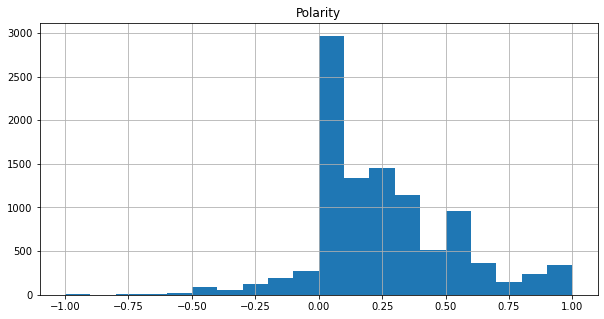

In [18]:
df4[["Polarity"]].hist(bins=20, figsize=(10, 5))

Result: This histogram shows that the distribution of Polarity is almost normal. The majority polarity is more than zero. That means maximum reviews have a positive sentiment.

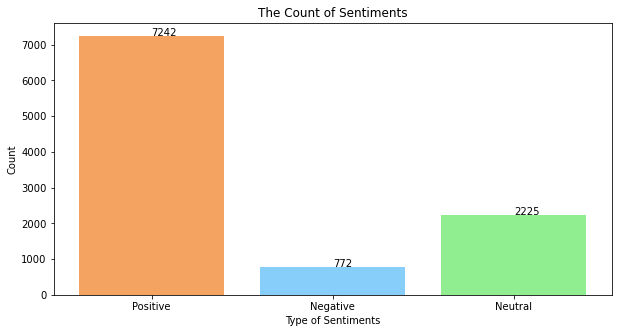

In [19]:
#Plot the bar chart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

# creating data on which bar chart will be plot
x = ['Positive', 'Negative', 'Neutral']
y = [len(df4[df4.Polarity >0]),len(df4[df4.Polarity <0]), len(df4[df4.Polarity == 0])]
plt.figure(figsize = (10, 5))
plt.bar(x, y,color = ['sandybrown','lightskyblue','lightgreen'])
addlabels(x,y)#add value labels
plt.title("The Count of Sentiments")
plt.xlabel("Type of Sentiments")
plt.ylabel("Count")
plt.show()

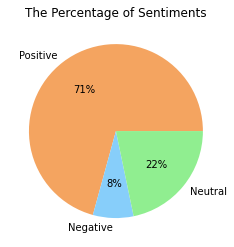

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
total = len(df4['Polarity'])
data = [len(df4[df4.Polarity >0])/total,len(df4[df4.Polarity <0])/total, len(df4[df4.Polarity == 0])/total]
labels = ['Positive', 'Negative', 'Neutral']

#create pie chart
plt.pie(data, labels = labels, colors = ['sandybrown','lightskyblue','lightgreen'], autopct='%.0f%%')
plt.title("The Percentage of Sentiments")
plt.show()

Result: From the chart, we can see that the majority of the comments are positive, which takes up 71% of comments, while negative comments have lowest percentage. 

### Data Exploration based on Polarity Scores

In [21]:
#append the data column userID and LikeCount into the df4 data frame
user_ID = df['user_ID']
Like_Count = df['Like_Count']
Reply_Count = df['Reply_Count']
df4['user_ID'] = user_ID
df4['Like_Count'] = Like_Count
df4['Reply_Count'] = Reply_Count
# Observe the result
df4

,Comments,Polarity,user_ID,Like_Count,Reply_Count
0,thanks for this video ken.\n\ni decided to go ...,0.191667,user_981,0,0
1,hello ken jee!!! i'm doing a graduation on com...,0.433333,user_213,0,0
2,"thanks for this video, man. so useful. i'll me...",0.250000,user_1065,0,0
3,great video!!! i started learning python 8 mon...,0.456667,user_3391,0,0
4,been watching hours of your material (and tina...,0.341667,user_2816,0,0
...,...,...,...,...,...
10236,what's your prediction ken for 2018 or at leas...,0.466667,user_2676,0,0
10237,nice. i have some nice models for this doing v...,1.000000,user_4533,0,0
10238,great video! can you please post the github li...,0.300000,user_3368,0,0
10239,hi ken\n\ni've been researching about this. wo...,NaN,user_5345,2,6


### Top 10 UserID with the Polarity Score

In [22]:
# get top 10 most frequent ID
n = 10
df4['user_ID'].value_counts()[:n].index.tolist()
lst = df4['user_ID'].value_counts()[:n].index
top_userID = pd.DataFrame(lst,columns =['user_ID'])
#top_userID

In [23]:
# find the corresponding porlarity score for top 10 ID
top_ten_user_Polarity_list = []
for i in lst:
    #print(f"user: {i}")
    top_ten_user_Polarity_list.append(df4.loc[df4["user_ID"] == i, "Polarity"].iloc[0])
    #print(df4.loc[df4["user_ID"] == i, "porlarity"].iloc[0])

In [24]:
# Top 10 ID with its porlarity score
top_userID['Polarity Score'] = top_ten_user_Polarity_list
print (top_userID)

     user_ID  Polarity Score
0  user_2385        0.232792
1   user_659        0.000000
2  user_3452       -0.208333
3  user_1178        0.150000
4    user_77        0.200758
5  user_4187        0.400000
6  user_3451        0.260000
7   user_530        1.000000
8  user_1889        0.420000
9   user_830        0.568750


### Top 10 Like_Count with the Polarity Score

In [32]:
# get top 10 like count with its sentiments score
top10_like = df4.sort_values(by=['Like_Count'],ascending=False).head(10)
top10_like[['Like_Count','Polarity']]

,Like_Count,Polarity
2644,501,0.633333
1159,346,0.000000
2655,317,0.034259
9885,267,0.500000
8681,255,0.600000
9380,205,0.328283
8005,190,0.000000
9221,186,0.700000
6455,182,0.275000
715,145,0.162500


### Top 10 Reply_Count with the Polarity Score

In [44]:
# get top 10 reply count with its Polarity score
top10_reply = df4.sort_values(by=['Reply_Count'],ascending=False).head(10)
top10_reply[['Reply_Count','Polarity','Comments']]

,Reply_Count,Polarity,Comments
9380,21,0.328283,thanks for watching everyone! please leave som...
2655,17,0.034259,despite of all these .. and no matter how man...
3201,14,0.250000,unfortunately this code is broken now. i think...
9745,14,0.000000,if you would be interested in me doing a live ...
9372,13,0.200000,goal is to learn the basis of ml in the next 6...
2080,13,0.000000,i haven't made a single project yet not even t...
8531,12,0.306250,"again, special thank you to the data professor..."
3126,12,0.350000,hello ken! i am a student pursuing their data ...
2440,12,0.000000,mistake #1: plugging your usbs into papayas\nh...
9230,12,0.152381,i started to study python one week ago and is ...


### WordCloud based on sentimental analysis

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### WordCloud (in general)

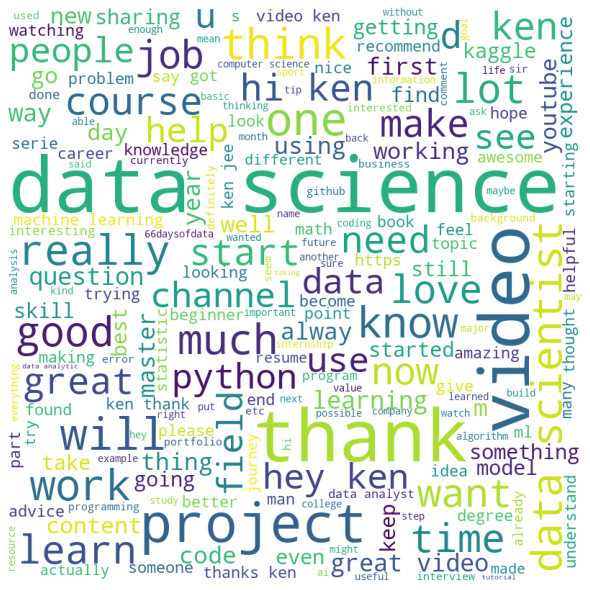

In [28]:
from wordcloud import WordCloud, STOPWORDS
 

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df3_lower['Comments']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### WordCloud based on Positive Sentiments

In [35]:
positive_comments = df4.loc[df4['Polarity']>0]
#positive_comments

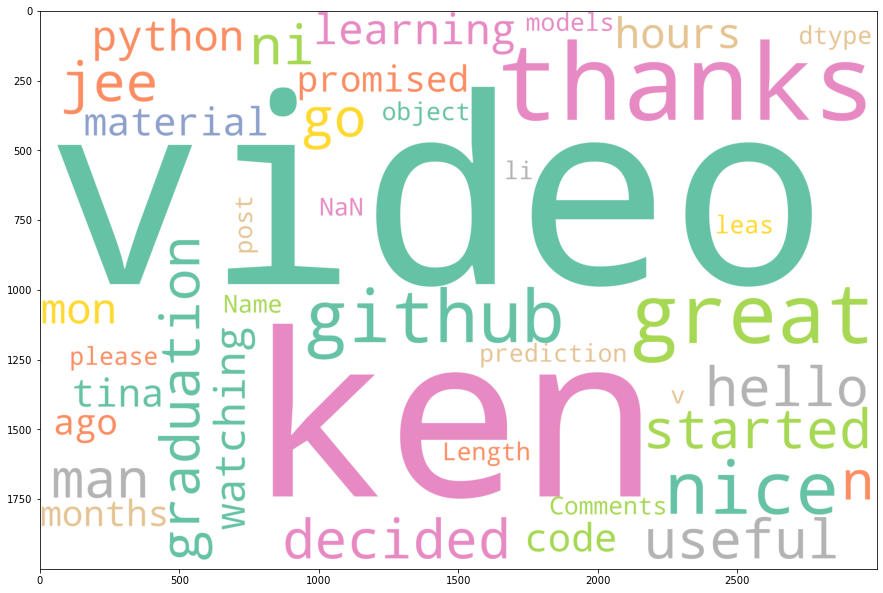

In [54]:
from wordcloud import WordCloud
cloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2').generate(str(positive_comments['Comments']))
fig = plt.figure(figsize=(15,15))
plt.imshow(cloud)

### WordCloud based on Negative Sentiments

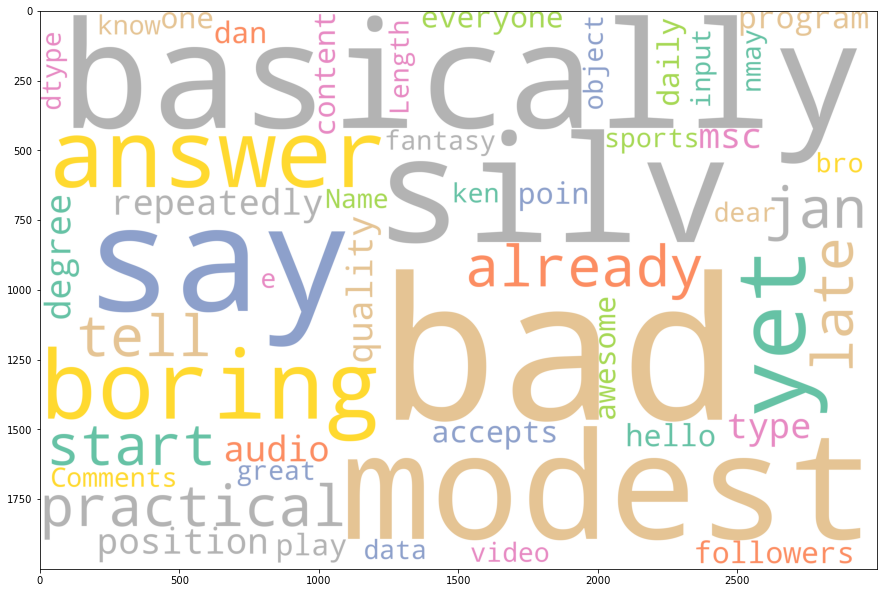

In [55]:
negative_comments = df4.loc[df4['Polarity']<0]
negative_comments = df4.loc[df4['Polarity']<0]
cloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2').generate(str(negative_comments['Comments']))
fig = plt.figure(figsize=(15,15))
plt.imshow(cloud)